In [1]:
import torch
import torchvision
from torchvision import transforms

# Define a transform to convert the data to tensor
transform = transforms.Compose([transforms.ToTensor()])

# Download the training set
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Download the test set
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


100%|██████████| 9912422/9912422 [00:00<00:00, 9979693.20it/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 6884274.48it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 8405445.63it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 2380423.44it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



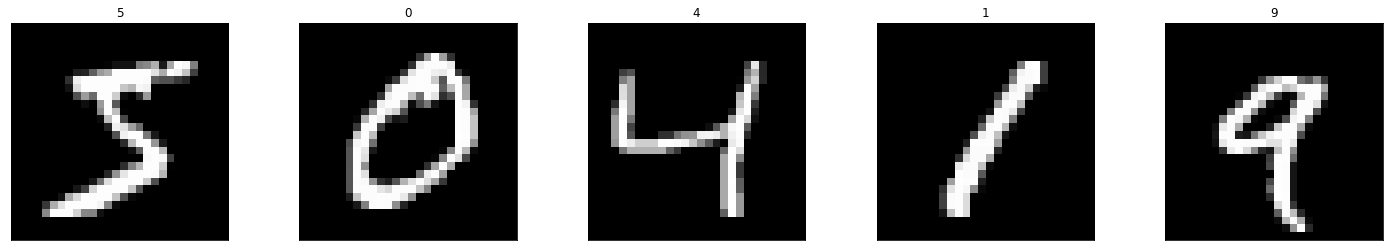

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#1a visualize the first 5 member fo the training set
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(np.squeeze(trainset.train_data[idx]), cmap='gray')
    ax.set_title(str(trainset.train_labels[idx].item()))

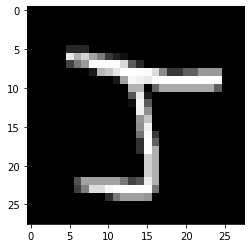

In [15]:
# 1b Visualize the third number in the dataset but rotated counterclockwise using the using only the flip and transpose functions in numpy.
plt.imshow(np.transpose(np.flip(np.array(trainset.train_data[2]), axis = 1)), cmap='gray')

In [55]:
#1c Create a batch of MNIST digits and flatten it to a single vector.
batch_size = 16
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
dataiter = iter(trainloader)
images, labels = next(dataiter)
flatten_images = images.view(batch_size, -1)
single_vector = np.array(images.flatten())
print(images.shape)
print(flatten_images.shape)
print(single_vector.shape)

torch.Size([16, 1, 28, 28])
torch.Size([16, 784])
(12544,)


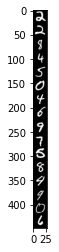

In [56]:
# 1d Visualize all numbers in the batch vertically by collapsing the batch dimension with the other appropriate dimension
fig = plt.figure(figsize=(25, 4))
plt.imshow(single_vector.reshape(28*batch_size, -1), cmap='gray')

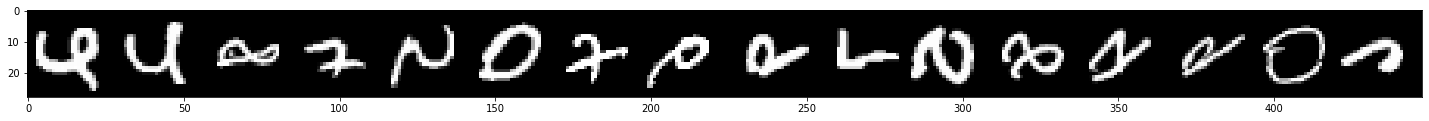

In [57]:
# 1e . Now visualize all numbers in the batch horizontally.
fig = plt.figure(figsize=(25, 4))
plt.imshow(single_vector.reshape(28, -1, order='F'), cmap='gray')

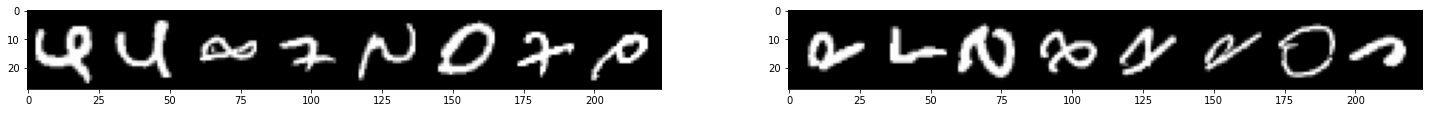

In [58]:
# 1f. plit the batch dimension into two new batches and plot horizontally. If your batch has an odd number place the extra digit on the bottom row. 
fig,ax = plt.subplots(1,2, figsize=(25, 4))
first_batch = single_vector[0:int(len(single_vector)/2)]
second_batch = single_vector[int(len(single_vector)/2):]
ax[0].imshow(first_batch.reshape(28, -1, order='F'), cmap='gray')
ax[1].imshow(second_batch.reshape(28, -1, order='F'), cmap='gray')

In [59]:
'''
2. More fun with tensor manipulations and plotting.
    a. Normalize the batch of data to only contain values between [0,1].
    b. Find the mean of each sample in the batch.
    c. Plot the means in a histogram using the matplotlib library.
    d. Create a 3D plot of a single MNIST digit using matplotlib. The pixel locations 
    will specify the x and y coordinates, while the pixel value will denote the z 
    coordinate. 
    e. Order each sample in your MNIST dataset by digit i.e. (all 0s, then all 1s, etc).
    f. Use the matplotlib subplot function to recreate the above histogram, but 
    for each individual digit.
    g. Combine all histograms into a single plot. Make sure the legend is accurate 
    and easy to interpret. 
    h. Write a one-line code to normalize each image in a batch by its 
    corresponding mean. i.e. say you have a batch of 64 images, you compute 
    mean for each image and divide the image values by that number.
'''

'\n2. More fun with tensor manipulations and plotting.\n    a. Normalize the batch of data to only contain values between [0,1].\n    b. Find the mean of each sample in the batch.\n    c. Plot the means in a histogram using the matplotlib library.\n    d. Create a 3D plot of a single MNIST digit using matplotlib. The pixel locations \n    will specify the x and y coordinates, while the pixel value will denote the z \n    coordinate. \n    e. Order each sample in your MNIST dataset by digit i.e. (all 0s, then all 1s, etc).\n    f. Use the matplotlib subplot function to recreate the above histogram, but \n    for each individual digit.\n    g. Combine all histograms into a single plot. Make sure the legend is accurate \n    and easy to interpret. \n    h. Write a one-line code to normalize each image in a batch by its \n    corresponding mean. i.e. say you have a batch of 64 images, you compute \n    mean for each image and divide the image values by that number.\n'

In [60]:
#2a Normalize the batch of data to only contain values between [0,1].
'''the data is already normalized to [0,1]'''
print(images.min(), images.max())

tensor(0.) tensor(1.)


In [61]:
#2b Find the mean of each sample in the batch.
mean = [np.mean(np.array(images[i,:,:,:])) for i in range(batch_size)]
print(mean)

[0.20904362, 0.15028512, 0.10467688, 0.09421768, 0.11070429, 0.1847439, 0.11517106, 0.11994798, 0.14855944, 0.1072629, 0.22557524, 0.14453782, 0.13166267, 0.090431176, 0.110489205, 0.117051825]


(array([2., 6., 1., 1., 3., 0., 1., 0., 1., 1.]),
 array([0.09043118, 0.10394558, 0.11745999, 0.1309744 , 0.1444888 ,
        0.15800321, 0.17151761, 0.18503202, 0.19854642, 0.21206084,
        0.22557524], dtype=float32),
 <BarContainer object of 10 artists>)

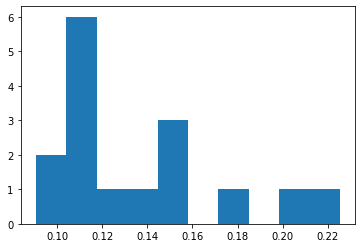

In [62]:
#2c Plot the means in a histogram using the matplotlib library.
plt.hist(mean)

Text(0.5, 0.92, 'tensor(2)')

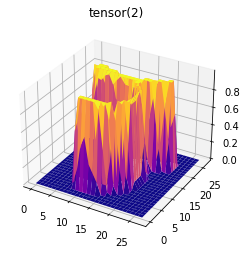

In [70]:
#2d Create a 3D plot of a single MNIST digit using matplotlib. The pixel locations
#will specify the x and y coordinates, while the pixel value will denote the z
#coordinate.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, 28, 1)
y = np.arange(0, 28, 1)
X, Y = np.meshgrid(x, y)
Z = np.array(images[1,0,:,:])
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_title(labels[1])

In [75]:
#2e Order each sample in your MNIST dataset by digit i.e. (all 0s, then all 1s, etc).
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000, shuffle=True)
dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()
labels = labels.numpy()
order = np.argsort(labels)
images = images[order]
labels = labels[order]

In [83]:
1//5

0

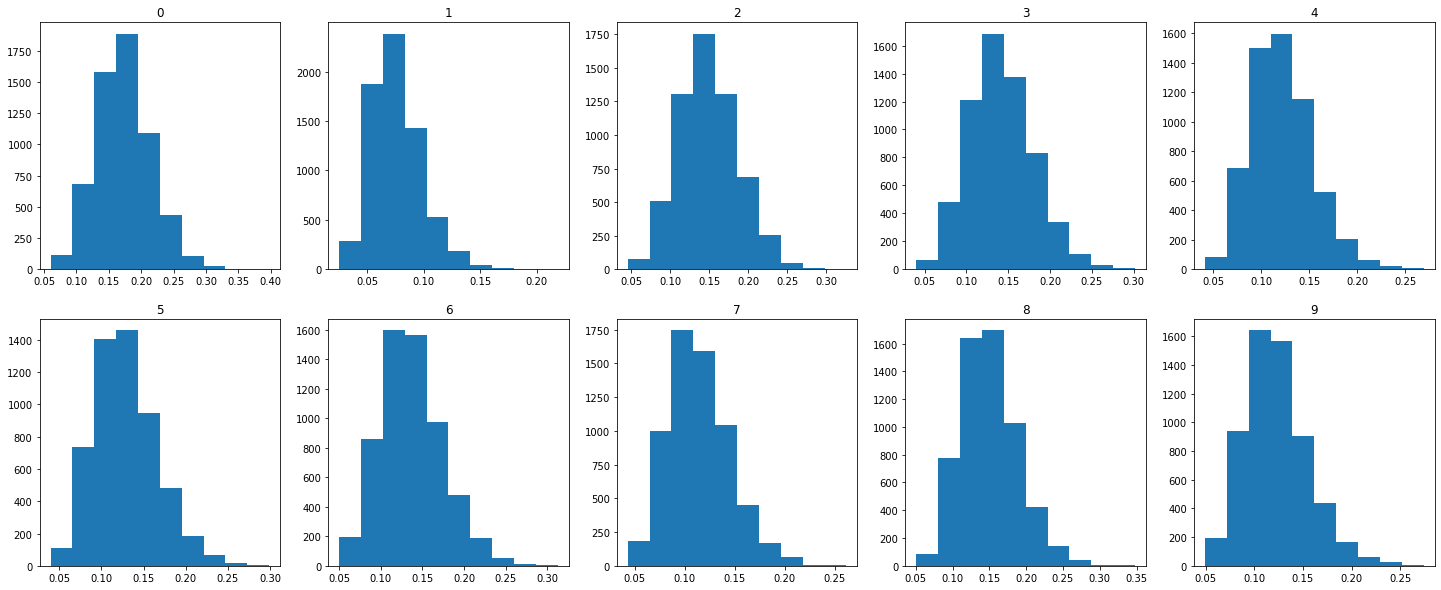

In [82]:
#2f Use the matplotlib subplot function to recreate the above histogram, but
#for each individual digit.
fig,ax = plt.subplots(2,5, figsize=(25, 10))
for i in range(10):
    ax[i//5, i%5].hist([np.mean(np.array(images[j,:,:,:])) for j in range(len(images)) if labels[j] == i])
    ax[i//5, i%5].set_title(i)

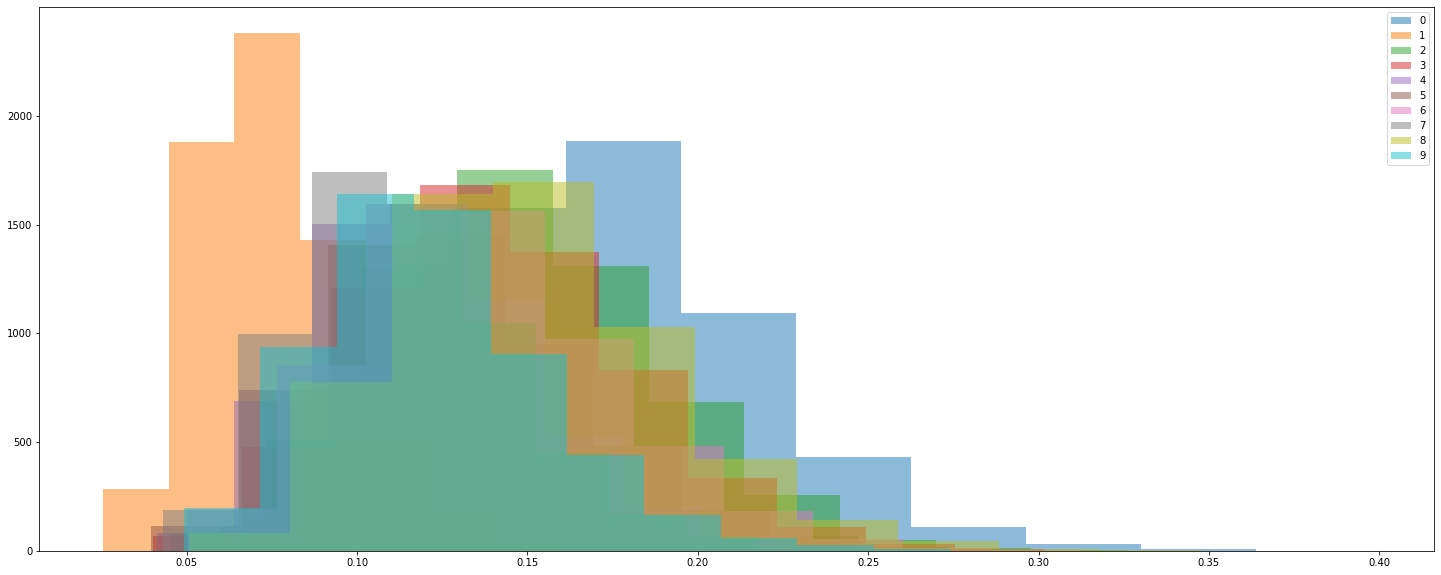

In [86]:
#2g Combine all histograms into a single plot. Make sure the legend is accurate and easy to interpret.
fig,ax = plt.subplots(1,1, figsize=(25, 10))
for i in range(10):
    ax.hist([np.mean(np.array(images[j,:,:,:])) for j in range(len(images)) if labels[j] == i], label = i, alpha = 0.5)
ax.legend()


In [92]:
#2h Write a one-line code to normalize each image in a batch by its corresponding mean. i.e. say you have a batch of 64 images, you compute mean for each image and divide the image values by that number.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()

mean = [np.mean(np.array(images[i,:,:,:])) for i in range(len(images))]
print(*mean)

0.08612945 0.067136854 0.14032114 0.0962335 0.16838735 0.13852039 0.11684675 0.1740296 0.11293517 0.13487396 0.08877051 0.12805623 0.09304722 0.12962686 0.14229691 0.08297819 0.073439375 0.09430272 0.17928672 0.084673874 0.17268908 0.17838135 0.16763204 0.13094239 0.13785014 0.17690076 0.1332133 0.08945078 0.17031312 0.07335434 0.14474289 0.20910865 0.14833933 0.12893657 0.121918775 0.13957584 0.12896158 0.14799419 0.10388156 0.13731493 0.21122448 0.12277412 0.09431773 0.06380552 0.071018405 0.11824731 0.08010705 0.08488394 0.11524109 0.06255502 0.11713686 0.18333334 0.08238796 0.16635153 0.089645855 0.19851442 0.06642157 0.14514807 0.11097939 0.17058824 0.18012206 0.21869247 0.22962686 0.14302722
